In [3]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt 
from sklearn import preprocessing 
from sklearn.neighbors import KNeighborsClassifier

In [4]:
policias = pd.read_csv('data/PoliceKillingsUS.csv', encoding='ISO-8859-1')

policias

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.0,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.0,M,NaN,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.0,M,B,Oshkosh,WI,False,attack,Car,True


In [5]:
# Verificar valores nulos
print(policias.isnull().sum())

id                           0
name                         0
date                         0
manner_of_death              0
armed                        9
age                         77
gender                       0
race                       195
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                        65
body_camera                  0
dtype: int64


In [6]:
# Eliminar filas con valores nulos
policias_cleaned = policias.dropna()

In [7]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
categorical_columns = ['manner_of_death', 'armed', 'gender', 'race', 'city', 'state', 'threat_level', 'flee']

for column in categorical_columns:
    policias_cleaned[column] = label_encoder.fit_transform(policias_cleaned[column])


/tmp/ipykernel_1902/1982273011.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  policias_cleaned[column] = label_encoder.fit_transform(policias_cleaned[column])
/tmp/ipykernel_1902/1982273011.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  policias_cleaned[column] = label_encoder.fit_transform(policias_cleaned[column])
/tmp/ipykernel_1902/1982273011.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [8]:
policias_cleaned

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,0,25,53.0,1,0,1047,47,True,0,2,False
1,4,Lewis Lee Lembke,02/01/15,0,25,47.0,1,5,20,37,False,0,2,False
2,5,John Paul Quintero,03/01/15,1,63,23.0,1,2,1247,16,False,1,2,False
3,8,Matthew Hoffman,04/01/15,0,62,32.0,1,5,1008,4,True,0,2,False
4,9,Michael Rodriguez,04/01/15,0,44,39.0,1,2,361,5,False,0,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2519,2805,Aries Clark,25/07/17,0,64,16.0,1,1,693,2,False,2,2,False
2523,2808,Kesharn K. Burney,26/07/17,0,66,25.0,1,1,276,35,False,0,0,False
2525,2820,Deltra Henderson,27/07/17,0,25,39.0,1,1,509,18,False,0,0,False
2533,2817,Isaiah Tucker,31/07/17,0,66,28.0,1,1,847,48,False,0,0,True


In [9]:
shot = policias_cleaned[policias_cleaned['manner_of_death'] == 0]
shot_and_tasered = policias_cleaned[policias_cleaned['manner_of_death'] == 1]

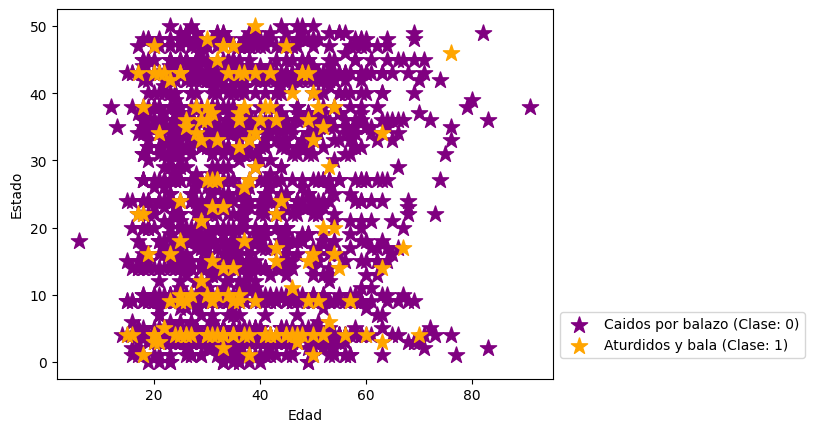

In [10]:
plt.scatter(shot["age"], shot["state"],
            marker="*", s=150, color="purple",
            label="Caidos por balazo (Clase: 0)")

plt.scatter(shot_and_tasered["age"], shot_and_tasered["state"],
            marker="*", s=150, color="orange", 
            label="Aturdidos y bala (Clase: 1)")

plt.ylabel("Estado")
plt.xlabel("Edad")
plt.legend(bbox_to_anchor=(1, 0.2)) 
plt.show()

In [11]:
datos = policias_cleaned[["age", "state"]]
clase = policias_cleaned["manner_of_death"]

escalador = preprocessing.MinMaxScaler()

datos = escalador.fit_transform(datos)

In [12]:
clasificador = KNeighborsClassifier(n_neighbors=5)

clasificador.fit(datos, clase)

KNeighborsClassifier()

/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Clase: [0]
Probabilidades por clase [[0.6 0.4]]


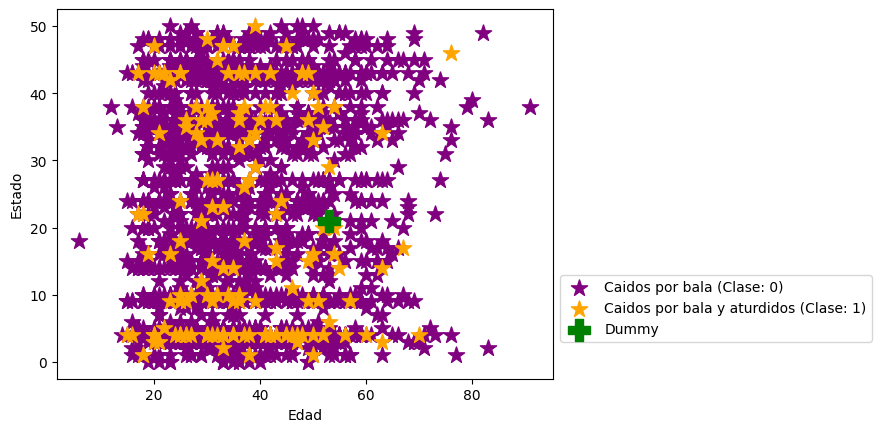

In [13]:
age = 53
state = 21

#Escalar los datos del nuevo solicitante
solicitante = escalador.transform([[age, state]])

#Calcular clase y probabilidades
print("Clase:", clasificador.predict(solicitante))
print("Probabilidades por clase",
      clasificador.predict_proba(solicitante))

#Código para graficar
plt.scatter(shot["age"], shot["state"],
            marker="*", s=150, color="purple", label="Caidos por bala (Clase: 0)")
plt.scatter(shot_and_tasered["age"], shot_and_tasered["state"],
            marker="*", s=150, color="orange", label="Caidos por bala y aturdidos (Clase: 1)")
plt.scatter(age, state, marker="P", s=250, color="green", label="Dummy") 
plt.ylabel("Estado")
plt.xlabel("Edad")
plt.legend(bbox_to_anchor=(1, 0.3))
plt.show()


In [21]:
valores_unicos = policias_cleaned['state'].unique()

print(valores_unicos)

[47 37 16  4  5 36  3 12 38 43 35 18 26 44  2 14 33 32 23 24 45 31 15 17
 19 30  9 13 20 29 22 10 42 27  0 34 21  1 25 48 40  8  7 49 11 50 28  6
 41 46 39]


In [22]:
valores_unicos = policias_cleaned['age'].unique()

print(valores_unicos)

[53. 47. 23. 32. 39. 18. 22. 35. 34. 25. 31. 41. 30. 37. 28. 42. 36. 49.
 71. 33. 29. 43. 24. 75. 68. 27. 48. 21. 67. 19. 54. 17. 61. 56. 40. 45.
 26. 59. 38. 51. 74. 57. 46. 16. 50. 20. 77. 58. 64. 52. 63. 44. 60. 66.
 83. 72. 76. 62. 55. 69. 15. 65.  6. 12. 70. 80. 14. 82. 13. 73. 91. 79.]


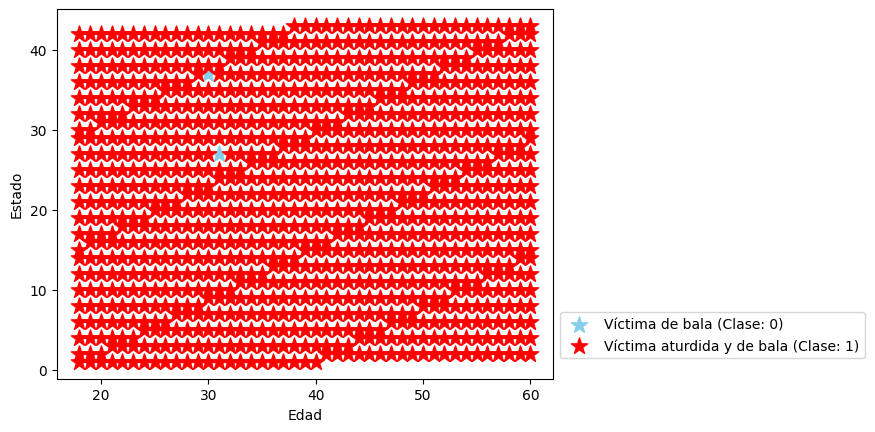

In [31]:
# Datos sintéticos de todos los posibles solicitantes
# Ajustar los rangos para que tengan el mismo tamaño
num_solicitantes = 1000
estados = np.repeat(np.arange(1, 44), num_solicitantes // 43)
edades = np.tile(np.arange(18, 61), num_solicitantes // 43)

# Crear DataFrame
todos = pd.DataFrame({'age': edades, 'state': estados})

# Escalar los datos
solicitantes = escalador.transform(todos)

# Predecir todas las clases
clases_resultantes = clasificador.predict(solicitantes)

# Código para graficar
shot = todos[clases_resultantes == 1]
shot_and_tasered = todos[clases_resultantes == 0]
plt.scatter(shot["age"], shot["state"],
            marker="*", s=150, color="skyblue", label="Víctima de bala (Clase: 0)")
plt.scatter(shot_and_tasered["age"], shot_and_tasered["state"],
            marker="*", s=150, color="red", label="Víctima aturdida y de bala (Clase: 1)")
plt.ylabel("Estado")
plt.xlabel("Edad")
plt.legend(bbox_to_anchor=(1, 0.2))
plt.show()